<a href="https://colab.research.google.com/github/AshleyNyaboke/Phase-1-Project/blob/main/Clustering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing K means in python

In [30]:
# Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, silhouette_score


In [31]:
#Create data
data = {'x' : [1,2,3,8,9,10],
         'y': [1,2,3,8,9,10] }
df = pd.DataFrame(data)
df


,x,y
0,1,1
1,2,2
2,3,3
3,8,8
4,9,9
5,10,10


In [32]:
#Scale the data
scaler = StandardScaler()
scaler_df = scaler.fit_transform(df)

In [33]:
#Apply K means
kmeans = KMeans(n_clusters=2 , random_state=42)
kmeans.fit(scaler_df)

KMeans(n_clusters=2, random_state=42)

In [34]:
#Get cluster assignments
df['Cluster'] = kmeans.labels_

In [35]:
#Evaluate clustering
print (f"Calinski-harabasz score:",calinski_harabasz_score(scaler_df, kmeans.labels_))
print(f"Silhouette-score:", silhouette_score(scaler_df, kmeans.labels_) )



Calinski-harabasz score: 73.49999999999997
Silhouette-score: 0.8065476190476191


In [36]:
df

,x,y,Cluster
0,1,1,0
1,2,2,0
2,3,3,0
3,8,8,1
4,9,9,1
5,10,10,1


# Determining the optimal number of clusters(Elbow method)

In [37]:
#Import libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


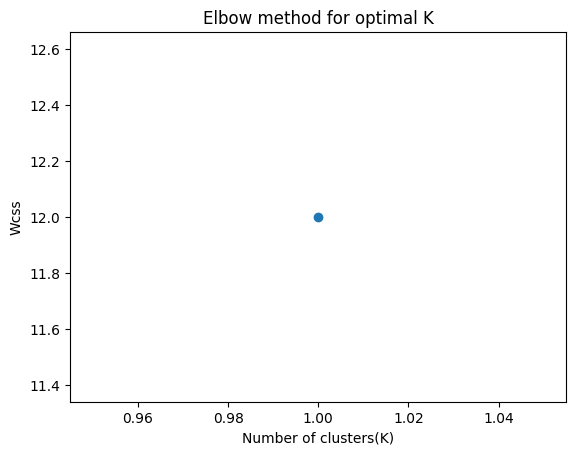

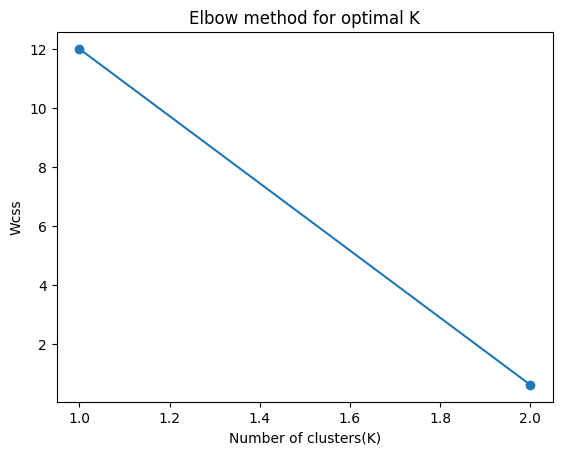

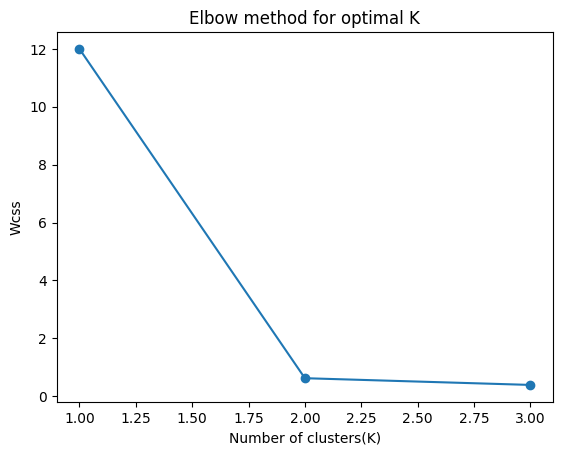

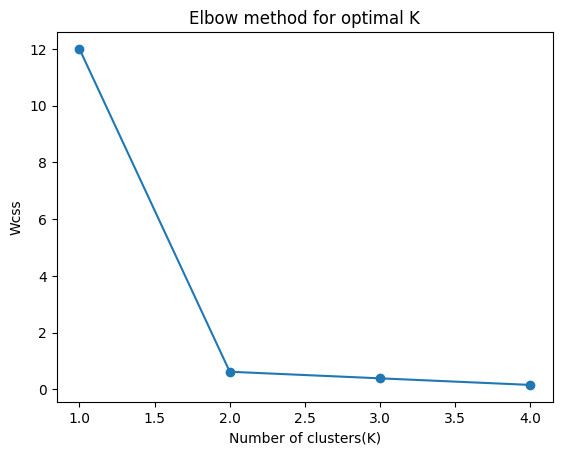

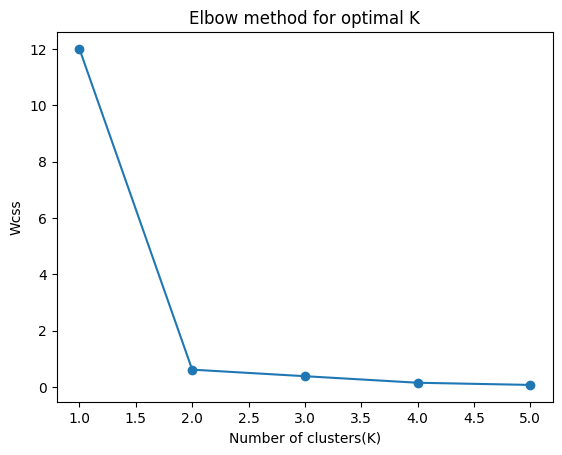

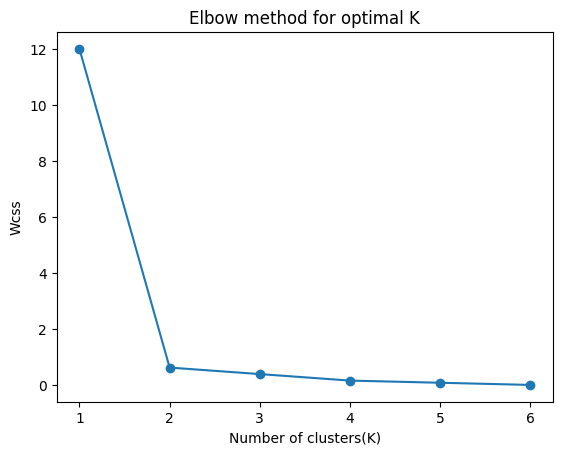

In [38]:
#Elbow method
wcss = []

for k in range(1, min(11,len(scaler_df) + 1)): #limit K to the number of samples
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaler_df)
    wcss.append(kmeans.inertia_) #WCSS


    plt.plot(range(1, len(wcss) + 1), wcss, marker = 'o')
    plt.title('Elbow method for optimal K')
    plt.xlabel('Number of clusters(K)')
    plt.ylabel('Wcss')
    plt.show()

#Hierarchical Agglomerative Clustering

In [39]:

#import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [40]:
#Load and prepare data
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)

In [44]:
#scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [45]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


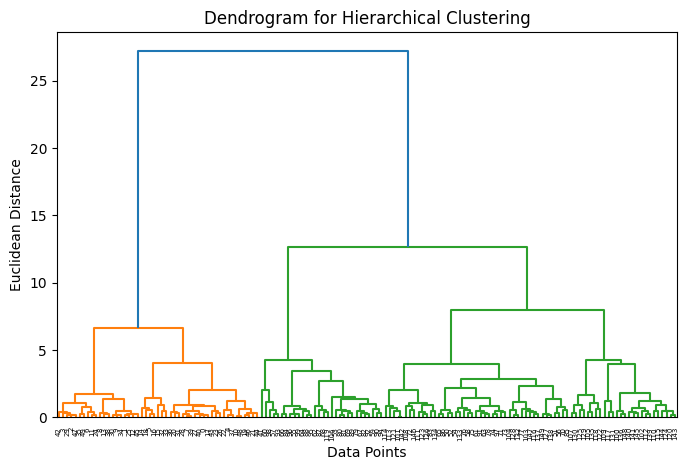

In [46]:
# Step 4: Plot dendrogram to decide number of clusters
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

#Apply agglomerative clustering

In [49]:
#We will choose 3 clusters based on the dendogram
#Apply agglomerative clustering
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = hc.fit_predict(scaled_df)

In [50]:
#Add cluster labels to the dataframe
df['Cluster'] = labels
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


#Visualize the clusters

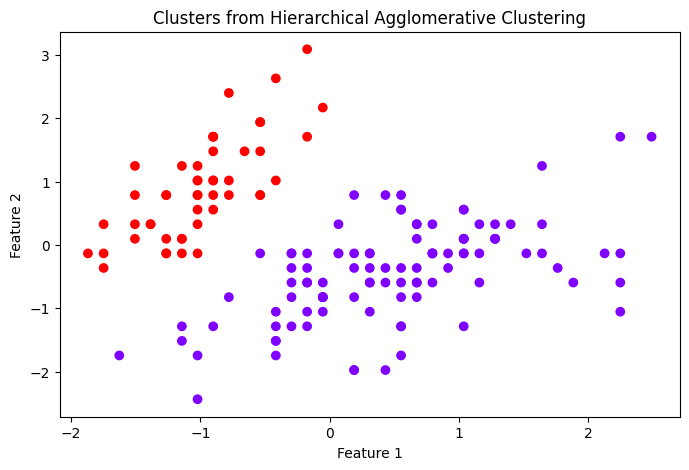

In [51]:
plt.figure(figsize=(8,5))
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=labels, cmap='rainbow')
plt.title("Clusters from Hierarchical Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()